In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

from sa_decomp_layer import SADecompLayer

import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
#tf.__version__
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

plt.rcParams['figure.figsize'] = [10,10]

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K


from tensorflow.keras.layers import Layer
from tensorflow.image import flip_up_down, flip_left_right, rot90
from tensorflow.compat.v1 import extract_image_patches
import numpy as np

from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
def get_filter(layer):
    layer = model.layers[layer]

    # check for convolutional layer
    if 'conv' not in layer.name:
        return None
    # get filter weights
    filters, biases = layer.get_weights()
    return (filters)
    #print(layer.name, filters.shape)

In [4]:
get_filter(1).shape

(3, 3, 3, 64)

## Block 1 

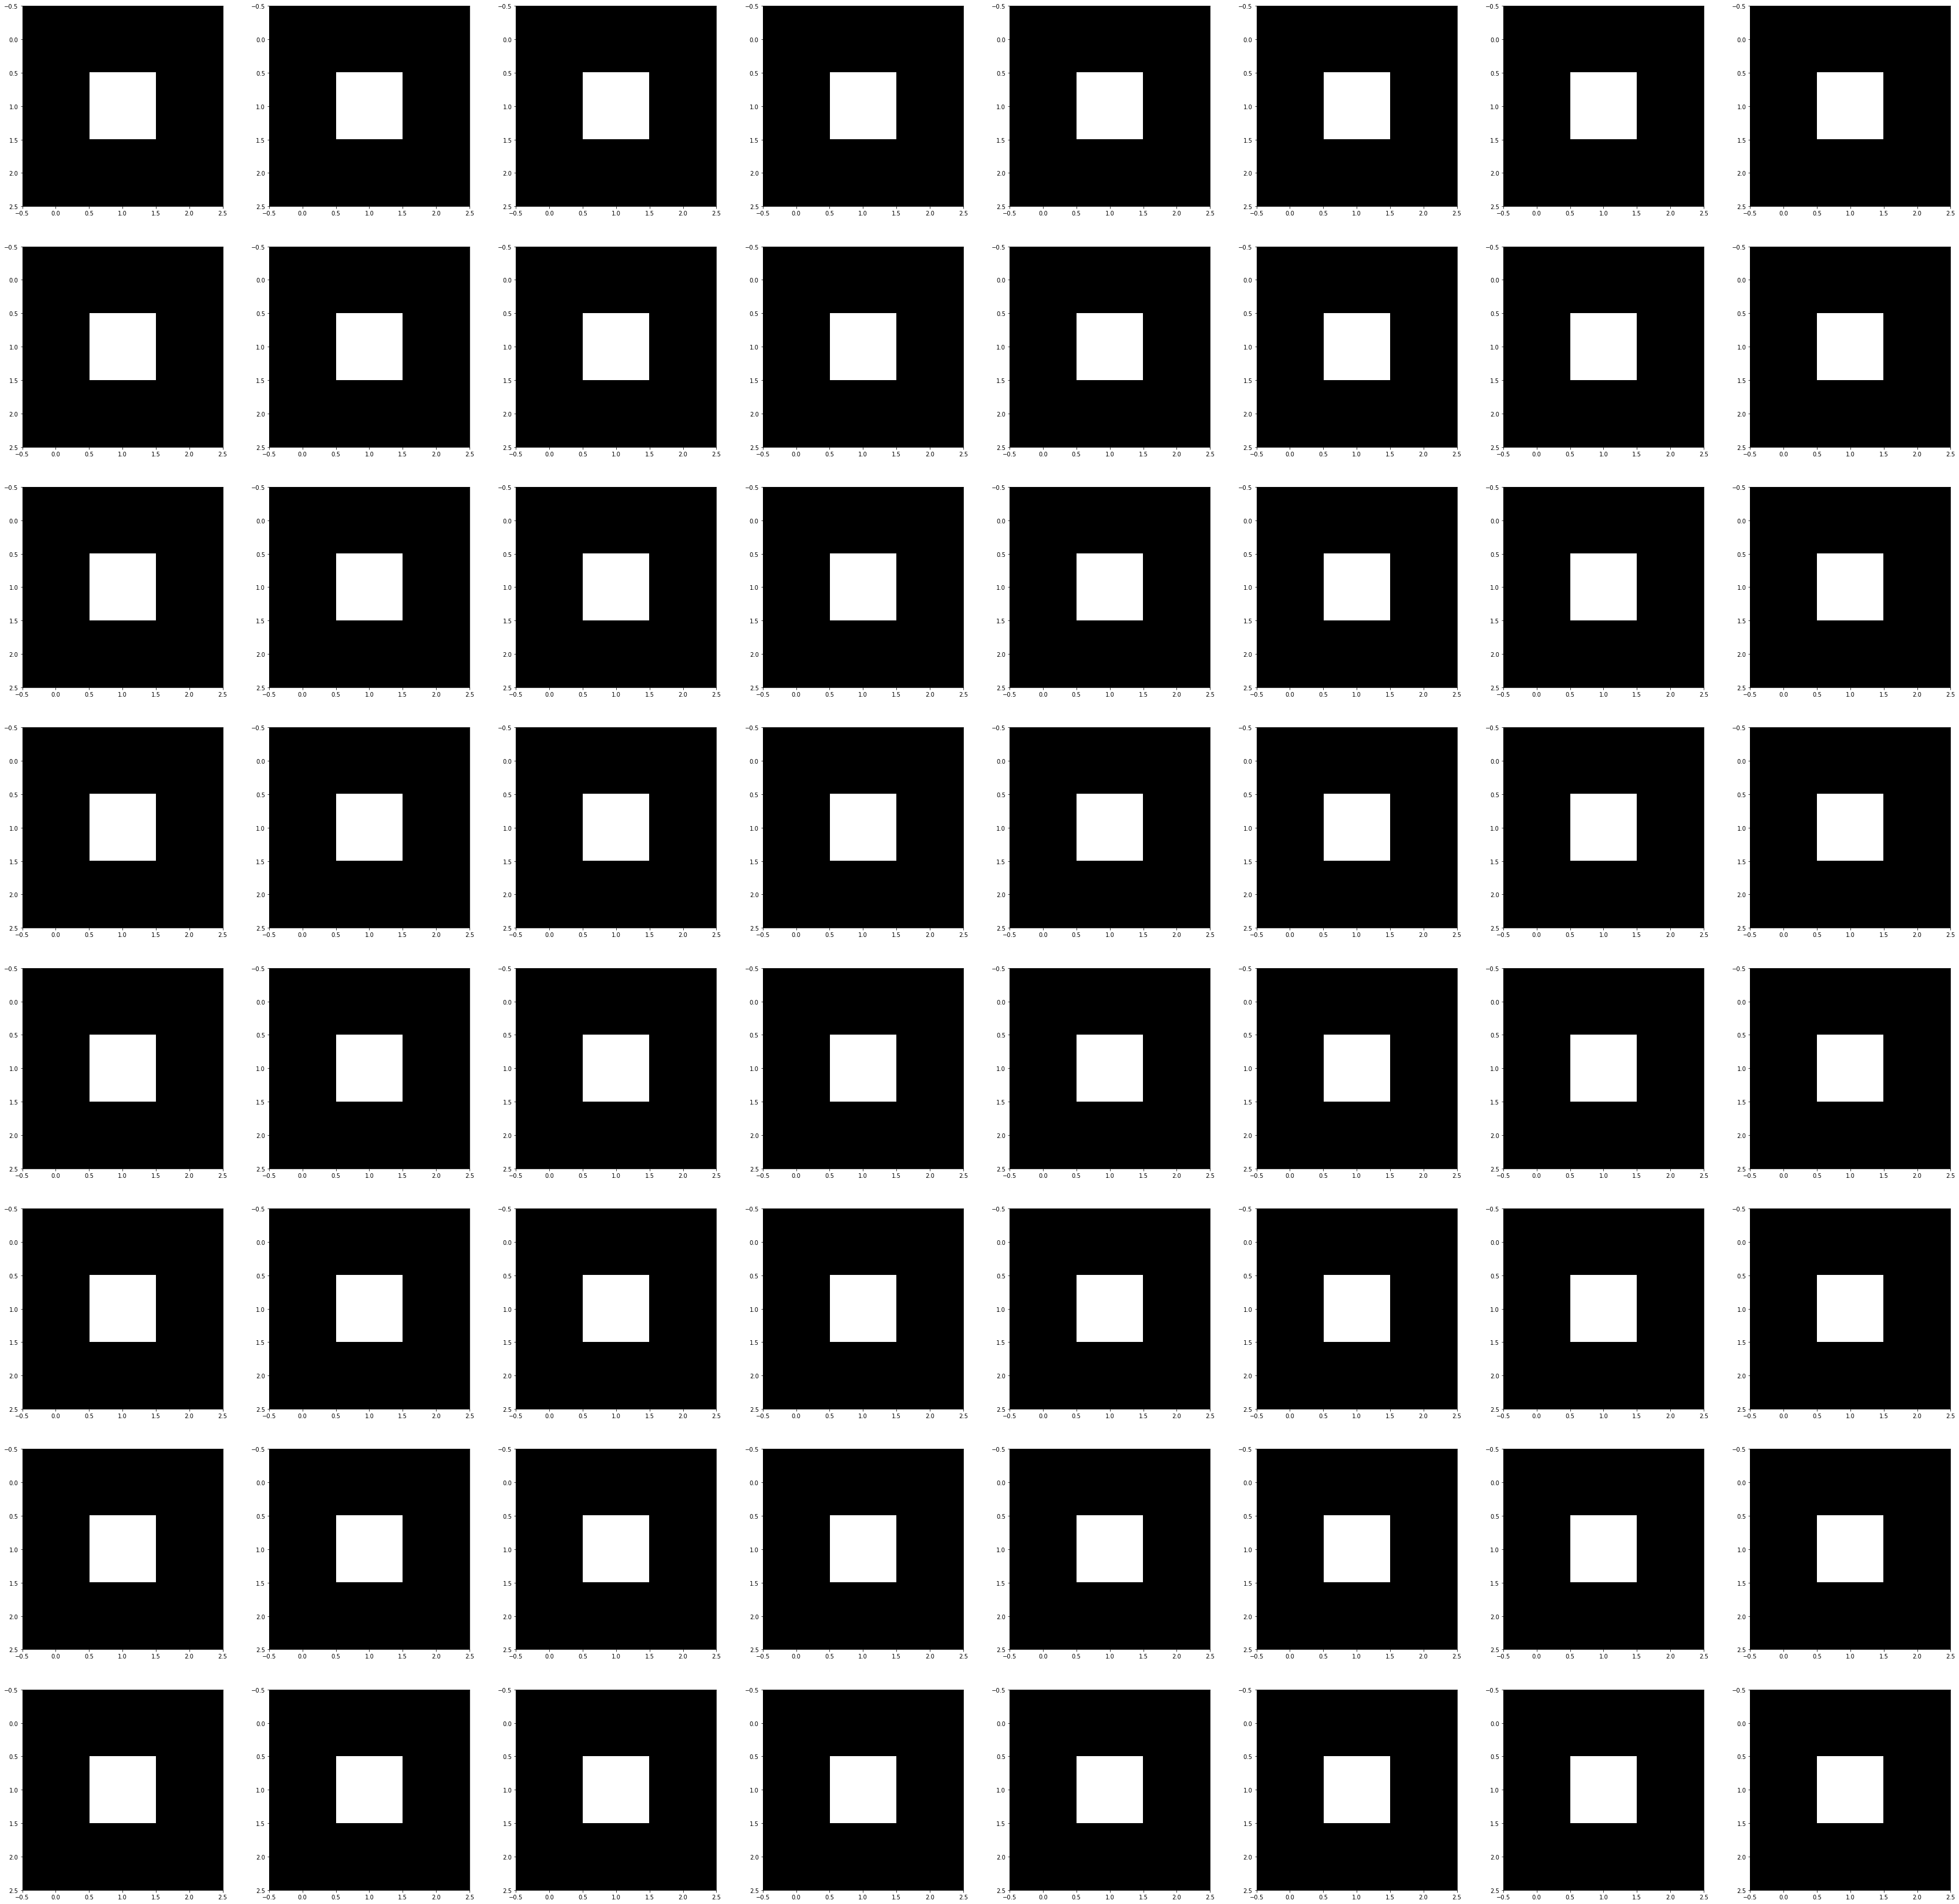

In [46]:
from skimage.feature import hog
from skimage import data, exposure

fig = plt.figure(figsize=(60, 60))

columns =8
rows = 8


filters = get_filter(1)
for i in range(filters.shape[-1]):
    filter = filters[:,:,:, i]
    #for j in range(filter.shape[-1]):
    f = filter[:,:, 0]
    _, hog_image = hog(f, orientations=8, pixels_per_cell=(2,2),
                    cells_per_block=(2, 2), visualize=True, channel_axis=None)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))
    fig.add_subplot(rows,columns, i+1)
    plt.imshow(f, cmap=plt.get_cmap('gray'))

    #fig.add_subplot(rows,columns, i+2)
    #plt.imshow(hog_image_rescaled, cmap=plt.get_cmap('gray'))



plt.show()

In [40]:
hog_image

array([[0.        , 0.        , 0.        ],
       [0.        , 0.14259495, 0.        ],
       [0.        , 0.        , 0.        ]], dtype=float32)